<a href="https://colab.research.google.com/github/karima33/python_projects/blob/main/DL_check03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.layers import Dense, Dropout,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.optimizers import RMSprop
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data set 
data_ = pd.read_csv("/content/bank.csv", sep=',')
data_.shape

(11162, 17)

In [3]:
#The head of the dataset
data_.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
#Showing  the columns 
data_.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [5]:
#Some general informations about the data columns and values like the types 
data_.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
#Summary statistics of the numerical  columns
data_.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
#Summary statistics of the non numerical  columns
data_.describe(exclude=np.number)

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [8]:
#finding missing informations / values
data_.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

When using Pandas, we can find the standard missing values (missing values that Pandas can detect) using isnull() and get a summary of the missing values using isnull().sum(). 

The other type of missing values is non-standard missing values, which Pandas cannot find on its own and that needs our assistance. When manually scanning through the dataset, we can see that there are 4 fields that contains the value ‘unknown’.

In [9]:
# Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
new_data = pd.read_csv('/content/bank.csv',sep=',', na_values = missing_values)

print(new_data.isnull().sum())

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64


# Data visualization

Age Shape: (11162, 17)


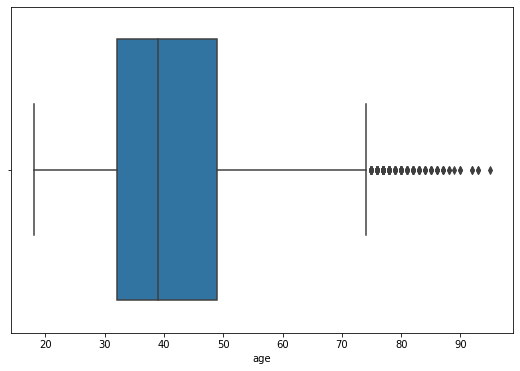

In [10]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Age Shape:",data_.shape)
## Max and Min Quantile
max_val = data_.age.quantile(0.75)
min_val = data_.age.quantile(0.25)

sns.boxplot(data_['age'])
plt.show()

When checking the boxplot for the age feature, we can see that there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore, i will not be removing the datapoints that are identified here as outliers, since they can carry information in them.

Balance Shape: (11162, 17)


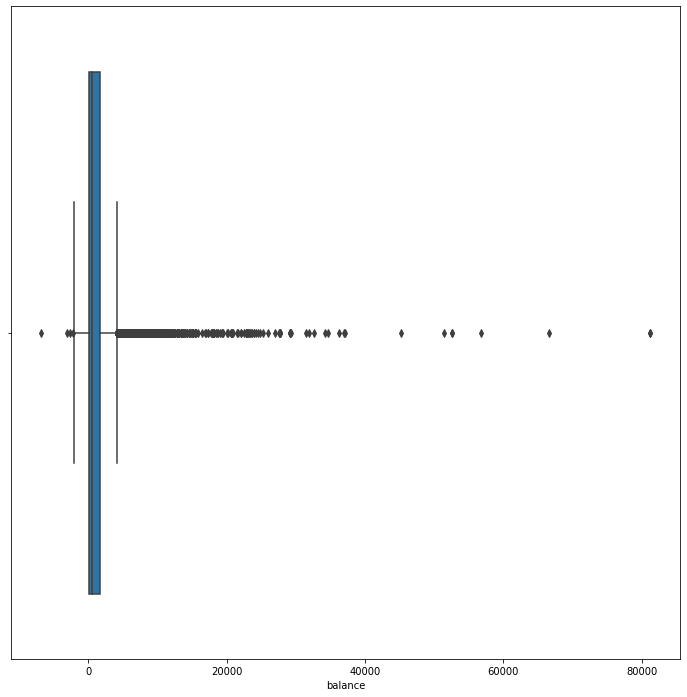

122.0


In [11]:
#Checking the balance feature 
fig, axes = plt.subplots(figsize=(12, 12))

print("Balance Shape:",data_.shape)
## Max and Min Quantile
max_val = data_.balance.quantile(0.75)
min_val = data_.balance.quantile(0.25)

sns.boxplot(data_['balance'])
plt.show()
print(min_val)

When checking the above visualized boxplot for the balance feature, we can see that eventhough there are many data points outside the boxplot as in the age boxplot, we can point out a range where the datapoints start to spread wider. Therefore, i will manually set the cutoff region for outliers as balance < -6000 and balance > 50000, which is purely out of my discretion.

After Balance Shape: (11154, 17)


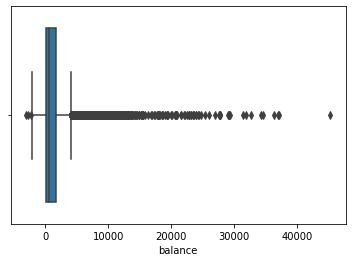

In [12]:
# removing datapoints that have balance values greater than 50000 and less than -6000
data_ = data_[(data_['balance']>-6000) & (data_['balance']<50000)]

print("After Balance Shape:",data_.shape)

sns.boxplot(data_['balance'])
plt.show()

Day Shape: (11154, 17)


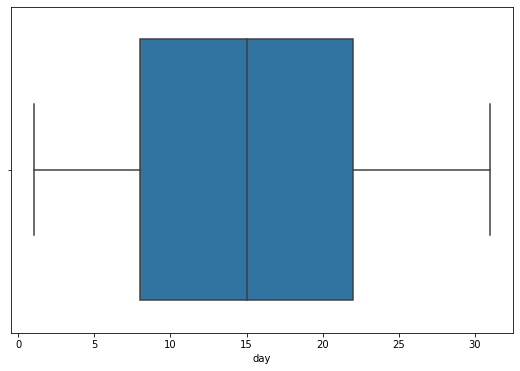

In [13]:
# Checking the box plot for day feature
fig, axes = plt.subplots(figsize=(9, 6))
print("Day Shape:",data_.shape)
## Max and Min Quantile
max_val = data_.balance.quantile(0.75)
min_val = data_.balance.quantile(0.25)

sns.boxplot(data_['day'])
plt.show()

There are no outliers in the day feature.

Duration Shape: (11154, 17)


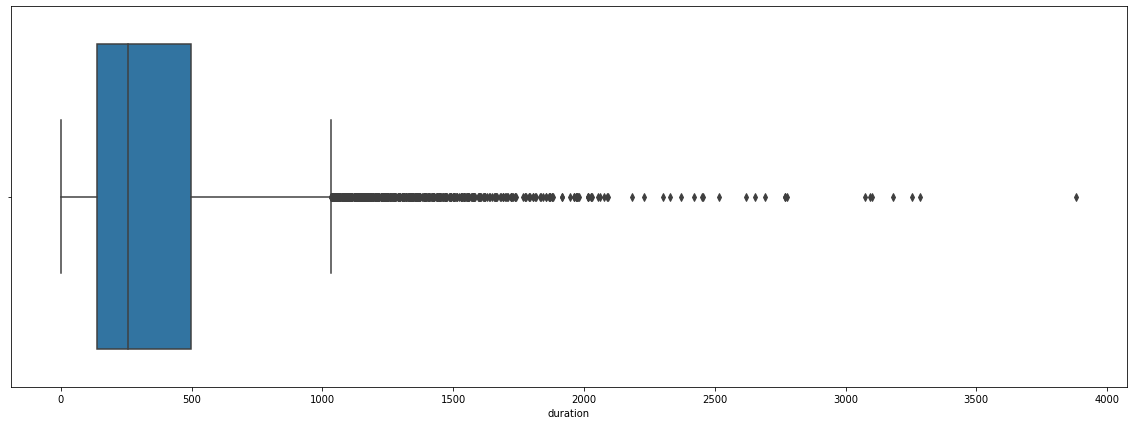

In [14]:
# Checking the box plot for duration feature
fig, axes = plt.subplots(figsize=(20, 7))
print("Duration Shape:",data_.shape)
## Max and Min Quantile
max_val = data_.balance.quantile(0.75)
min_val = data_.balance.quantile(0.25)

sns.boxplot(data_['duration'])
plt.show()

When checking the above box plot, we can see that, there a significant gap has first occured around the duration value 2600. Therefore i decided to clear the datapoints after duration 2600 as handling outliers in this feature.

After Duration Shape: (11141, 17)


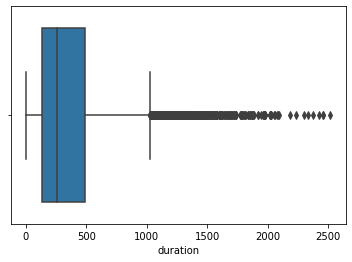

In [15]:
# removing datapoints that have duration values greater than 2600
data_ = data_[(data_['duration']<2600)]

print("After Duration Shape:",data_.shape)

sns.boxplot(data_['duration'])
plt.show()

We can see that after removing the aforesaid outliers, the number of datapoints in the dataset has been educed to 45169.

Campaign Shape: (11141, 17)


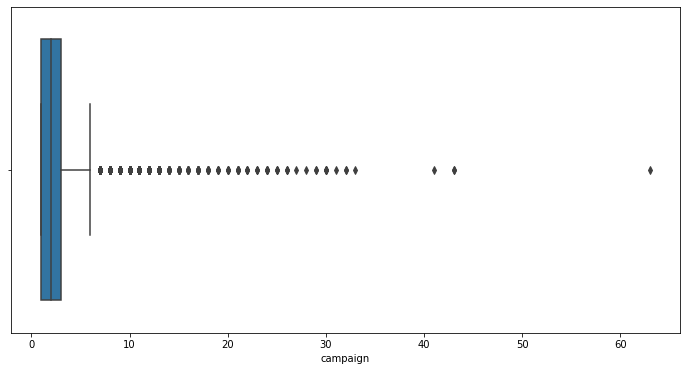

In [16]:
# Checking the box plot for campaign feature
fig, axes = plt.subplots(figsize=(12, 6))
print("Campaign Shape:",data_.shape)
## Max and Min Quantile
max_val = data_.campaign.quantile(0.75)
min_val = data_.campaign.quantile(0.25)

sns.boxplot(data_['campaign'])
plt.show()

When checking the boxplot visualization, we can see that a break has occured in the datapoints outside the boxplot aroung the campaign count 40. Therefore, i will be clearing the datapoints that has campaign contact count more than 40.

After Campaign Shape: (11137, 17)


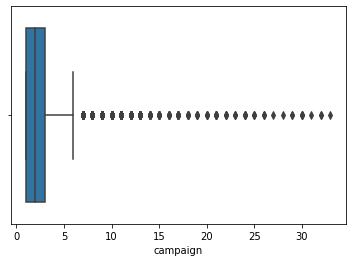

In [17]:
# removing datapoints that have campaign values greater than 2600
data_ = data_[(data_['campaign']<40)]

print("After Campaign Shape:",data_.shape)

sns.boxplot(data_['campaign'])
plt.show()

pdays Shape: (11137, 17)


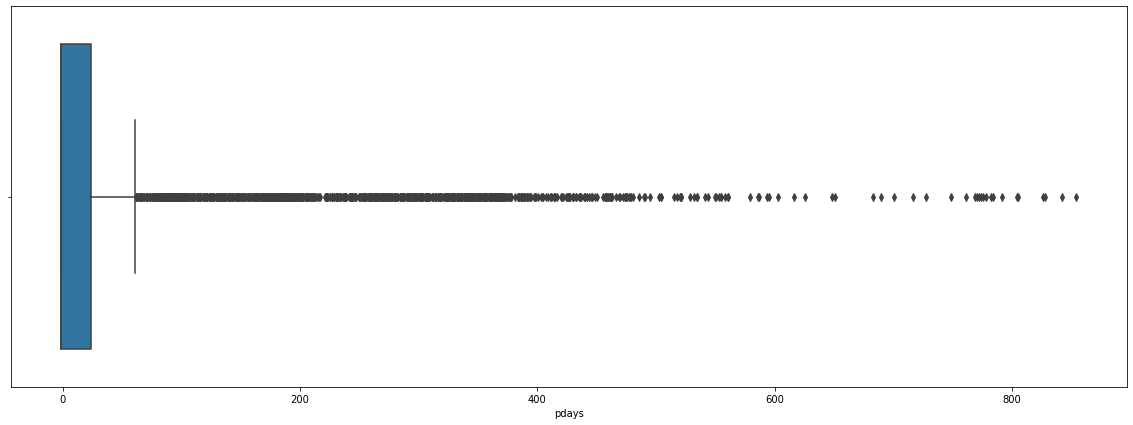

In [18]:
# Checking the box plot for pdays feature
fig, axes = plt.subplots(figsize=(20, 7))
print("pdays Shape:",data_.shape)
## Max and Min Quantile
max_val = data_.pdays.quantile(0.75)
min_val = data_.pdays.quantile(0.25)

sns.boxplot(data_['pdays'])
plt.show()

We can see that the values has started breaking from a point aroung 580 pdays. Therefore i will be removing the outliers after pdays = 575

After pdays Shape: (11105, 17)


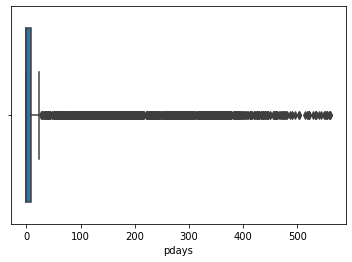

In [19]:
# removing datapoints that have pdays values greater than 575
data_ = data_[(data_['pdays']<575)]

print("After pdays Shape:",data_.shape)

sns.boxplot(data_['pdays'])
plt.show()

previous Shape: (11105, 17)


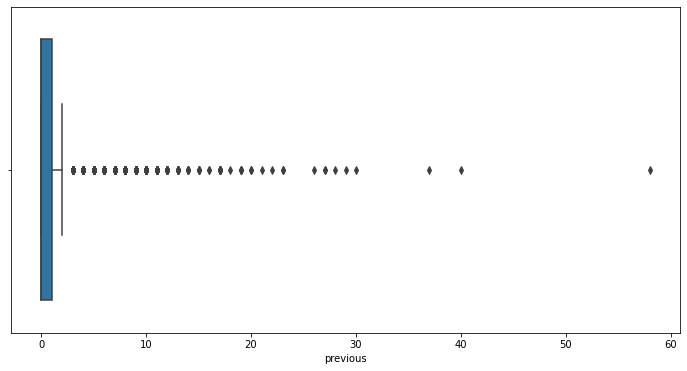

In [20]:
# Checking the box plot for previous feature
fig, axes = plt.subplots(figsize=(12, 6))
print("previous Shape:",data_.shape)
## Max and Min Quantile
max_val = data_.previous.quantile(0.75)
min_val = data_.previous.quantile(0.25)

sns.boxplot(data_['previous'])
plt.show()

We can see 3 clear outliers after 50 range. Therefore, i will be removing outliers after previous = 50.

After previous Shape: (11104, 17)


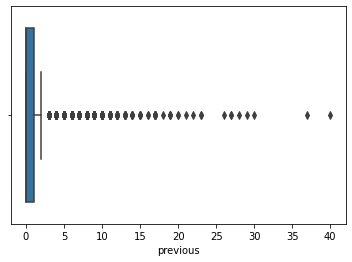

In [21]:
# removing datapoints that have previous values greater than 50
data_ = data_[(data_['previous']<50)]

print("After previous Shape:",data_.shape)

sns.boxplot(data_['previous'])
plt.show()

Now, after careful inspection of all the numerical fields (features) in the dataset, i have removed outliers and the remaining number datapoints of datapoints is 45092. Therefore, we have removed 45211 - 45092 = 119 outliers.

## Feature Engineering

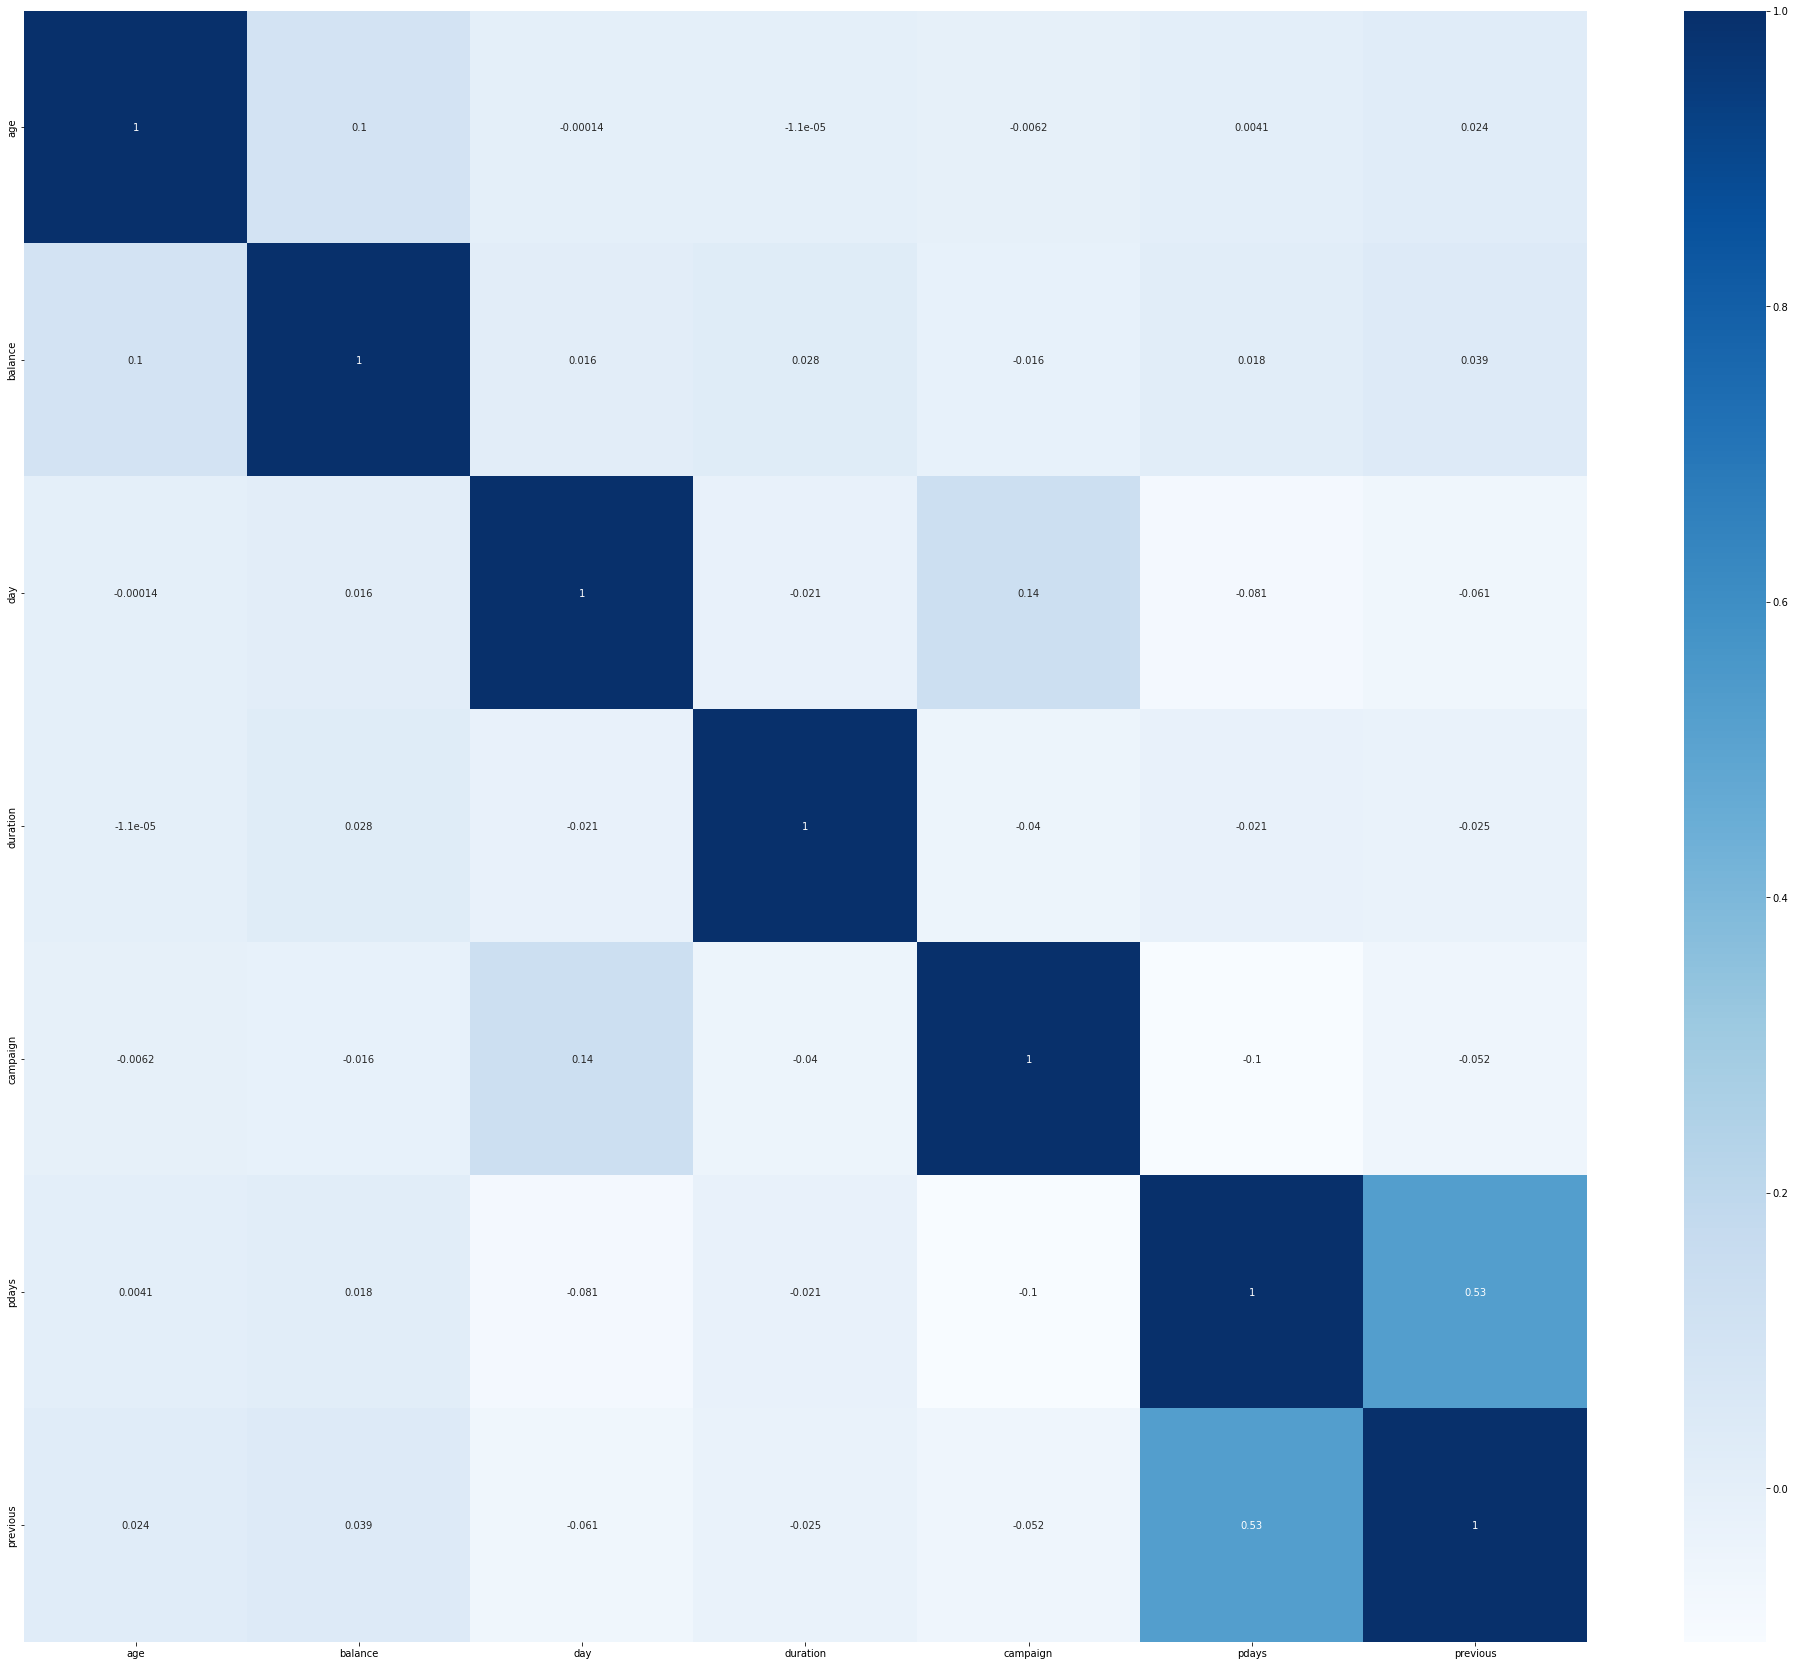

In [22]:
corrMatrix = data_.corr(method='pearson')
plt.figure(figsize=(35, 30))
sns.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

However, after performing the above code, we can see that there are no columns that has more than 0.95 correlation and that therefore, there are no columns to be removed.

#Feature Enoding

In this process, the categorical data are encoded into numerical data. The LabelEncoder is used to encode the class values to integers accordingly as follows.

In [23]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
data_['deposit'] = LabelEncoder().fit_transform(data_['deposit'])
data_['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11104, dtype: int64

There was one feature that can be considered as having Categorical Ordinal data type; education. This is because when considering the values present in this field, an order can be seen as secondary, tertiary etc. This feature was converted to numerical representation using mapping as follows.

In [24]:
from sklearn.preprocessing import OrdinalEncoder

# checking the values in education field
data_['education'].value_counts()

education_mapper = {"unknown":-1, "primary":1, "secondary":2, "tertiary":3}
data_["education"] = data_["education"].replace(education_mapper)
data_

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,2,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,2,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,2,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,2,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,3,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,1,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,2,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,2,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,2,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


#Removing Unwanted Features

The feature duration contains last contact duration, in seconds.

As said by the data source, this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Therefore, I have decided to remove the feature duration from the dataset used for prediction.

In [25]:
# data_.drop(['duration', 'contact','month','day'], inplace=True, axis = 1)
data_.drop(['duration'], inplace=True, axis = 1)

# inplace=True means the operation would work on the original object. axis=1 means we are dropping the column, not the row.

In [26]:
# Using OneHotEncoding pandas.get_dummies

# listing down the features that has categorical data
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
# categorial_features = ['job', 'marital', 'poutcome']
for item in categorial_features:
    # assigning the encoded data into a new DataFrame object
    df = pd.get_dummies(data_[item], prefix=item)
    data_ = data_.drop(item, axis=1)
    for categorial_feature in df.columns:
        #Set the new column in data to have corresponding df values
        data_[categorial_feature] = df[categorial_feature]

In [51]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    data_.replace({item:bin_dict},inplace=True)
   

After this point, we have encoded all the values in the dataset into numerical values

In [28]:
X = data_.values[:, :-1] # get all columns except the last column
y = data_['deposit']
# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

#Feature Scaling

After encoding categorical data, the dataset consists of features with different data ranges. These values are standardized and feature scaling is done as follows. Numerical features were scaled by removing the mean and by scaling to unit variance (StandardScaler) as follows.

In [29]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [30]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

## Applying PCA

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [37]:
from sklearn.decomposition import PCA
PCA_data_train =X_train
PCA_data_test =X_test
pca = PCA(n_components=15)
pca.fit(PCA_data_train)
X_pca_train= pca.fit_transform(PCA_data_train) 
X_pca_test= pca.fit_transform(PCA_data_test) 
principalDf_train = pd.DataFrame(data = X_pca_train)
principalDf_test = pd.DataFrame(data = X_pca_test)



# Developing the MultiLayer Perceptron Model

In [38]:
from sklearn.neural_network import MLPClassifier 

# define and train an MLPClassifier named mlp on the given data
clf = MLPClassifier(hidden_layer_sizes=(50,200,50),activation="relu",random_state=1).fit(principalDf_train, y_train)
y_pred=clf.predict(principalDf_test)
print(clf.score(principalDf_test, y_test))

0.7487618190004502


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74      1165
           1       0.70      0.82      0.76      1056

    accuracy                           0.75      2221
   macro avg       0.75      0.75      0.75      2221
weighted avg       0.76      0.75      0.75      2221

